In [2]:
#TODOS LOS IMPORT

import pandas as pd
import numpy as np

# IMPORTAMOS SKLEARN PARA HACER EL SPLIT PARA EL ENTRENAMIENTO Y TESTEO
# USAMOS LA MATRIZ DE CONFUSION PARA SACAR METRICAS
# USAMOS EL ALGORITMO DE RANDOM FOREST QUE SE USARA PARA PREDECIR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

#IMPORT PARA LA CURVA AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# graficos incrustados
%matplotlib inline


In [2]:
#LEO LOS FEATURES
#//////////EN ESTE CASO SOLO LOS NUMERICOS///////
#--------------SIN FEATURE CATEGORICOS AUN-------------
#--------------SIN FEATURE CATEGORICOS AUN-------------
#--------------SIN FEATURE CATEGORICOS AUN-------------
#--------------SIN FEATURE CATEGORICOS AUN-------------

#MANTENGO EL DF:"features_with_index_first_row" DADO QUE ES MAS SIMPLE TOMAR
#FEATURES LUEGO DE APLICADO EL MODELO

features_with_index_first_row=pd.read_csv('matrizDatosNumericos.csv')
features=features_with_index_first_row
data_label = pd.read_csv('labels_training_set.csv', low_memory=False)

# GUARDO LA LISTA DE NOMBRES YA QE LA VOY A USAR PARA GRAFICAR
feature_list = list(features.columns)

features.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,None,person,cantEventos,cantEventos.1,cantEventos.2,cantEventos.3,cantEventos.4,checkouts,checkouts.1,checkouts.2,...,accesos por searchEngine,accesos por searchEngine.1,accesos por searchEngine.2,accesos por searchEngine.3,accesos por searchEngine.4,accesos a la homepage,accesos a la homepage.1,accesos a la homepage.2,accesos a la homepage.3,accesos a la homepage.4
0,mes,NaN,1,2,3,4,5,1.0,2.0,3.0,...,1.0,2.0,3.0,4.0,5.0,1.0,2.0,3.0,4.0,5.0
1,0,0008ed71,0,0,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,000c79fe,0,0,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2,001802e4,0,0,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0019e639,1,3,0,1,9,0.0,2.0,0.0,...,1.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,5.0


In [3]:
# SI QUIERO RECUPERAR LA MATRIZ COMO ESTABA ANTES
# PUEDO REALIZARLO DE LA SIGUIENTE MANERA

df = pd.read_csv('matrizDatosNumericos.csv', header=[0, 1], skipinitialspace=True, tupleize_cols=True)
df.columns = pd.MultiIndex.from_tuples(df.columns)
print df.shape
df.head()
del df['None']
df=df.rename(columns={'Unnamed: 1_level_1' : 'month'}, level=1)
#df=df.rename(columns={'person' : 'person' }, level=0)
df.head()

/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:782: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)


(19414, 62)


person cantEventos             checkouts                ...   \
      month           1  2  3  4  5         1    2    3    4 ...    
0  0008ed71           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
1  000c79fe           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
2  001802e4           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
3  0019e639           1  3  0  1  9       0.0  2.0  0.0  1.0 ...    
4  001b0bf9           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    

  accesos por searchEngine                     accesos a la homepage       \
                         1    2    3    4    5                     1    2   
0                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   
1                      0.0  0.0  0.0  0.0  1.0                   0.0  0.0   
2                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   
3                      1.0  1.0  0.0  1.0  5.0                   1.0  1.0   
4                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   

                  
     3    4    5  
0  0.0  0.0  0.0  
1  0.0  0.0  1.0  
2  0.0  0.0  0.0  
3  0.0  1.0  5.0  
4  0.0  0.0  0.0  

[5 rows x 61 columns]

In [4]:
#ACOMODO LA LISTA PARA QUE COINCIDA CON EL DF DE FEATURES QUE QUEDARA LUEGO
print feature_list[0:8]
feature_list.pop(0)
feature_list.pop(0)
feature_list[0:8]


['None', 'person', 'cantEventos', 'cantEventos.1', 'cantEventos.2', 'cantEventos.3', 'cantEventos.4', 'checkouts']


['cantEventos',
 'cantEventos.1',
 'cantEventos.2',
 'cantEventos.3',
 'cantEventos.4',
 'checkouts',
 'checkouts.1',
 'checkouts.2']

In [5]:
#SOBRE LA MATRIZ RECUPERADA VERIFICO QUE LOS ELEMENTOS ESTAN EN
#DISTINTO ORDEN CON RESPECTO A LOS LABELS
print data_label.head()
df.head()

     person  label
0  0566e9c1      0
1  6ec7ee77      0
2  abe7a2fb      0
3  34728364      0
4  87ed62de      0


person cantEventos             checkouts                ...   \
      month           1  2  3  4  5         1    2    3    4 ...    
0  0008ed71           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
1  000c79fe           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
2  001802e4           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
3  0019e639           1  3  0  1  9       0.0  2.0  0.0  1.0 ...    
4  001b0bf9           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    

  accesos por searchEngine                     accesos a la homepage       \
                         1    2    3    4    5                     1    2   
0                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   
1                      0.0  0.0  0.0  0.0  1.0                   0.0  0.0   
2                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   
3                      1.0  1.0  0.0  1.0  5.0                   1.0  1.0   
4                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   

                  
     3    4    5  
0  0.0  0.0  0.0  
1  0.0  0.0  1.0  
2  0.0  0.0  0.0  
3  0.0  1.0  5.0  
4  0.0  0.0  0.0  

[5 rows x 61 columns]

In [6]:
#GENERO UN DF AUXILIAR DE LABELS EN EL ORDEN DE MI DATAFRAME
#COPIO LA SERIE DE PERSONAS
df1=pd.DataFrame(df['person']['month'])
#RENOMBRO LA COLUMNA
df1.columns = ['person']
#VERIFICO DIMENSIONES ANTES
print df1.shape
label= df1.join(data_label.set_index('person'), on='person', how='inner')
#VERIFICO DIMENSIONES DESPUES
print label.shape
#COMPRUEBO VALORES
print label['label'].value_counts()
label.head()



(19414, 1)
(19414, 2)
0    18434
1      980
Name: label, dtype: int64


,person,label
0,0008ed71,0
1,000c79fe,0
2,001802e4,0
3,0019e639,0
4,001b0bf9,0


In [7]:
#SE VERIFICA LA ESTRUCTURA DEL DF PARA ARMAR EL DF FINAL DE FEATURES
features.head()

,None,person,cantEventos,cantEventos.1,cantEventos.2,cantEventos.3,cantEventos.4,checkouts,checkouts.1,checkouts.2,...,accesos por searchEngine,accesos por searchEngine.1,accesos por searchEngine.2,accesos por searchEngine.3,accesos por searchEngine.4,accesos a la homepage,accesos a la homepage.1,accesos a la homepage.2,accesos a la homepage.3,accesos a la homepage.4
0,mes,NaN,1,2,3,4,5,1.0,2.0,3.0,...,1.0,2.0,3.0,4.0,5.0,1.0,2.0,3.0,4.0,5.0
1,0,0008ed71,0,0,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,000c79fe,0,0,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2,001802e4,0,0,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0019e639,1,3,0,1,9,0.0,2.0,0.0,...,1.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,5.0


In [8]:
#SE VERIFICA LA ESTRUCTURA DEL DF PARA ARMAR EL DF FINAL DE FEATURES
df.head()

person cantEventos             checkouts                ...   \
      month           1  2  3  4  5         1    2    3    4 ...    
0  0008ed71           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
1  000c79fe           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
2  001802e4           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    
3  0019e639           1  3  0  1  9       0.0  2.0  0.0  1.0 ...    
4  001b0bf9           0  0  0  0  1       0.0  0.0  0.0  0.0 ...    

  accesos por searchEngine                     accesos a la homepage       \
                         1    2    3    4    5                     1    2   
0                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   
1                      0.0  0.0  0.0  0.0  1.0                   0.0  0.0   
2                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   
3                      1.0  1.0  0.0  1.0  5.0                   1.0  1.0   
4                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   

                  
     3    4    5  
0  0.0  0.0  0.0  
1  0.0  0.0  1.0  
2  0.0  0.0  0.0  
3  0.0  1.0  5.0  
4  0.0  0.0  0.0  

[5 rows x 61 columns]

In [9]:
#ACOMODO MATRIZ DE FEATURES NUMERICOS (CON EL DATAFRAME FEATURES)
#features=features.iloc[1:,2:]
#print features.shape
#features.head()

In [10]:
#SE DECIDIO UTILIZAR DF

#ACOMODO MATRIZ DE FEATURES NUMERICOS (CON EL DATAFRAME DF)
features=df.iloc[:,1:]
print ("DIMENSIONES DE FEATURES: ",features.shape)
features.head()

('DIMENSIONES DE FEATURES: ', (19414, 60))


cantEventos             checkouts                     ...   \
            1  2  3  4  5         1    2    3    4    5 ...    
0           0  0  0  0  1       0.0  0.0  0.0  0.0  1.0 ...    
1           0  0  0  0  1       0.0  0.0  0.0  0.0  1.0 ...    
2           0  0  0  0  1       0.0  0.0  0.0  0.0  1.0 ...    
3           1  3  0  1  9       0.0  2.0  0.0  1.0  2.0 ...    
4           0  0  0  0  1       0.0  0.0  0.0  0.0  1.0 ...    

  accesos por searchEngine                     accesos a la homepage       \
                         1    2    3    4    5                     1    2   
0                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   
1                      0.0  0.0  0.0  0.0  1.0                   0.0  0.0   
2                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   
3                      1.0  1.0  0.0  1.0  5.0                   1.0  1.0   
4                      0.0  0.0  0.0  0.0  0.0                   0.0  0.0   

                  
     3    4    5  
0  0.0  0.0  0.0  
1  0.0  0.0  1.0  
2  0.0  0.0  0.0  
3  0.0  1.0  5.0  
4  0.0  0.0  0.0  

[5 rows x 60 columns]

In [11]:
#FUNCION A REALIZAR PARA CALCULAR LAS METRICAS DESEADAS
#ESTA HECHA A MEDIAS ES PARA TESTEAR
def evaluate(matrix, metric):
    tn=matrix[0][0]*1.0
    tp=matrix[1][1]*1.0
    fp=matrix[0][1]*1.0
    fn=matrix[1][0]*1.0
    total= tn+tp+fp+fn
    accuracy=(tp+tn)/total
    print "CONFUSION MATRIX"
    print "  TN     FP"
    print "  FN     TP"
    print matrix
    print('Model Performance')
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    
    return accuracy


In [12]:
# LO CONVIERTO FEATURES A UN ARREGLO DE NUMPY AL IGUAL QUE LOS LABELS
features = np.array(features)
print ("DIMENSIONES DE FEATURES: ",features.shape)


labels = np.array(label['label'])
print ("DIMENSIONES DE LABELS: ",labels.shape)

('DIMENSIONES DE FEATURES: ', (19414, 60))
('DIMENSIONES DE LABELS: ', (19414,))


In [13]:
# REALIZO EL SPLIT DE LA INFO DE LOS DATOS PARA ENTRENAR Y TESTEAR
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# INSTANCIAMOS EL MODELO CON 1000 ARBOLES DE DESICION
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth = 5)

# ENTRENAMOS EL MODELO CON LOS DATOS
rfr.fit(train_features, train_labels)

# TOMAMOS LA IMPORTANCIA NUMERICA DE LOS FEATURES
importances = list(rfr.feature_importances_)

# USAMOS EL MODELO PARA PREDECIR
predictions = rfr.predict(test_features)

# GENERAMOS LA MATRIZ DE CONFUSION
conf_mat = confusion_matrix(test_labels, np.around(predictions))

#CORREMOS NUESTRA FUNCION DE EVALUACION
evaluate(conf_mat,"Accuracy")

('Training Features Shape:', (14560, 60))
('Training Labels Shape:', (14560,))
('Testing Features Shape:', (4854, 60))
('Testing Labels Shape:', (4854,))
CONFUSION MATRIX
  TN     FP
  FN     TP
[[4600    3]
 [ 248    3]]
Model Performance
Accuracy = 0.9483%.


0.9482900700453234

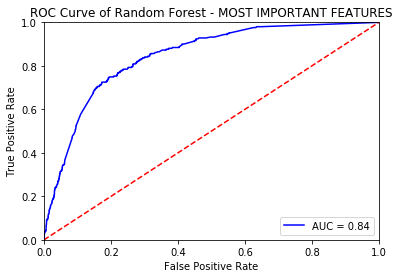

In [14]:
#GRAFICO DE CURVA AUC-ROC
#GRAFICO DE CURVA AUR-ROC PARA MOST-IMPORTANT
#SOLO SE DEBE REEMPLAZAR LOS LABELS Y LAS PREDICCIONES EN roc_curve

fpr, tpr, threshold = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest - MOST IMPORTANT FEATURES')
plt.show()

Text(0.5,1,'Variable Importances')

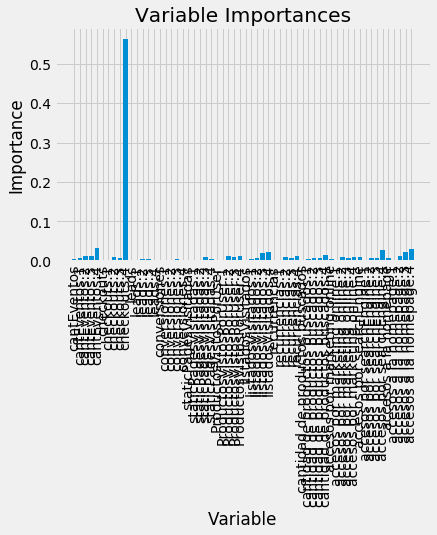

In [15]:
#GRAFICO DE IMPORTANCIA DE LOS FEATURES

# SETEAMOS EL ESTILO
plt.style.use('fivethirtyeight')

# LISTA DE LOS VALORES DE X PARA PLOTTEAR
x_values = list(range(len(importances)))


# GENERAMOS EL GRAFICO DE BARRAS
plt.bar(x_values, importances, orientation = 'vertical')

# COLOCAMOS LAS ETIQUETAS PARA EL EJE X
plt.xticks(x_values, feature_list, rotation='vertical')

# ETIQUETAS DE EJES Y TITULO
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

In [16]:
# TOMAMOS UN ARBOL CUALQUIERA PARA GRAFICARLO EN "tree.png"
tree = rfr.estimators_[5]

# EXPORTAMOS LA IMAGEN A UN ARCHIVO DOT
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# USAMOS EL ARCHIVO DOT PARA CREAR EL GRAFICO
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# GUARDAMOS EL GRAFICO EN EL ARCHIVO PNG
graph.write_png('tree.png')

In [17]:
# TOMAMOS LA IMPORTANCIA NUMERICA DE LOS FEATURES
importances = list(rfr.feature_importances_)

# LISTA DE TUPLAS CON VARIABLE E IMPORTANCIA
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# ORDENO LOS feature importances POR EL MAS IMPORTANTE PRIMERO
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# IMPRIMO EN PANTALLA LOS FEATURES Y SU IMPORTANCIA 
for pair in feature_importances:
    print('FEATURE: {:20} Importance: {}'.format(*pair)) 

FEATURE: checkouts.4          Importance: 0.56
FEATURE: cantEventos.4        Importance: 0.03
FEATURE: accesos por searchEngine.4 Importance: 0.03
FEATURE: accesos a la homepage.4 Importance: 0.03
FEATURE: listadosVisitados.3  Importance: 0.02
FEATURE: listadosVisitados.4  Importance: 0.02
FEATURE: accesos a la homepage.3 Importance: 0.02
FEATURE: cantEventos.1        Importance: 0.01
FEATURE: cantEventos.2        Importance: 0.01
FEATURE: cantEventos.3        Importance: 0.01
FEATURE: checkouts.2          Importance: 0.01
FEATURE: checkouts.3          Importance: 0.01
FEATURE: leads.3              Importance: 0.01
FEATURE: conversiones.3       Importance: 0.01
FEATURE: staticPagesVisitadas.3 Importance: 0.01
FEATURE: staticPagesVisitadas.4 Importance: 0.01
FEATURE: ProductosVistosPorUser.2 Importance: 0.01
FEATURE: ProductosVistosPorUser.3 Importance: 0.01
FEATURE: ProductosVistosPorUser.4 Importance: 0.01
FEATURE: listadosVisitados.2  Importance: 0.01
FEATURE: recurrencias.2       Im

In [18]:
# TOMO LOS 2 FEATURES MAS IMPORTANTES

features_most_important=features_with_index_first_row.loc[1:,['checkouts.4','cantEventos.4']]
most_feature_list=list(features_most_important.columns)
print features_most_important.shape
print features_most_important.head()

# LO CONVIERTO EN UN ARRAY DE NUMPY
features_most_important = np.array(features_most_important)

(19414, 2)
   checkouts.4  cantEventos.4
1          1.0              1
2          1.0              1
3          1.0              1
4          2.0              9
5          1.0              1


In [19]:
# INSTANCIO UN NUEVO PARA ESTAS 2 VARIABLES MAS IMPORTANTES
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42, max_depth = 5)

#GENERO EL SPLIT PARA TRAIN Y TEST
train_features_most_important, test_features_most_important, train_labels_most_important, test_labels_most_important = train_test_split(features_most_important, labels, test_size = 0.25, random_state = 42)

#IMPRIMO LAS DIMENSIONES DE LOS ELEMENTOS DE TRAIN Y TEST
print('Training Features Shape:', train_features_most_important.shape)
print('Training Labels Shape:', train_labels_most_important.shape)
print('Testing Features Shape:', test_features_most_important.shape)
print('Testing Labels Shape:', test_labels_most_important.shape)


# ENTRENO EL RANDOM FOREST PARA LOS MAS IMPORTANTES
rf_most_important.fit(train_features_most_important, train_labels_most_important)


# PREDIGO CON DICHO MODELO
predictions_most_important = rf_most_important.predict(test_features_most_important)


# GENERAMOS LA MATRIZ DE CONFUSION
most_important_conf_mat = confusion_matrix(test_labels_most_important, np.around(predictions_most_important))

#CORREMOS NUESTRA FUNCION DE EVALUACION
evaluate(most_important_conf_mat,"Accuracy")

('Training Features Shape:', (14560, 2))
('Training Labels Shape:', (14560,))
('Testing Features Shape:', (4854, 2))
('Testing Labels Shape:', (4854,))
CONFUSION MATRIX
  TN     FP
  FN     TP
[[4603    0]
 [ 251    0]]
Model Performance
Accuracy = 0.9483%.


0.9482900700453234

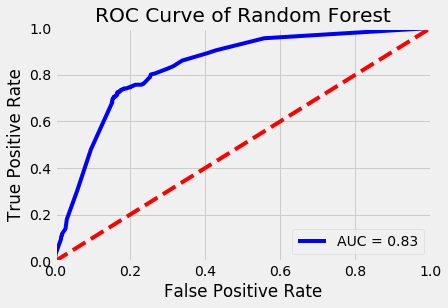

In [20]:
#GRAFICO DE CURVA AUR-ROC PARA MOST-IMPORTANT
#SOLO SE DEBE REEMPLAZAR LOS LABELS Y LAS PREDICCIONES EN roc_curve

fpr, tpr, threshold = roc_curve(test_labels_most_important, predictions_most_important)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

In [21]:
#IMPRESION POR PANTALLA DE IMPORTANCIA NUMERICA DE FEATURES

# TOMAMOS LA IMPORTANCIA NUMERICA
most_importances = list(rf_most_important.feature_importances_)
print most_importances

# LISTA DE TUPLAS CON FEATURE E IMPORTANCIA
feature_most_importances = [(features_most_important, round(most_importance, 2)) for features_most_important, most_importance in zip(most_feature_list, most_importances)]

# ORDENAMOS feature_most_importances POR EL MAS IMPORTANTE PRIMERO
feature_most_importances = sorted(feature_most_importances, key = lambda x: x[1], reverse = True)

# IMPRIMIMOS POR PANTALLA EL FEATURE Y SU IMPORTANCIA 
for pair in feature_most_importances:
    print('FEATURE: {:20} most_Importance: {}'.format(*pair)) 

[0.8485085152352949, 0.15149148476470528]
FEATURE: checkouts.4          most_Importance: 0.85
FEATURE: cantEventos.4        most_Importance: 0.15


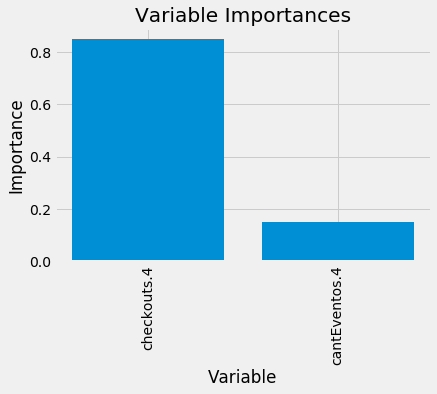

In [22]:
#GRAFICO DE IMPORTANCIA DE LOS FEATURES

# SETEAMOS EL ESTILO
plt.style.use('fivethirtyeight')

# LISTA DE LOS VALORES DE X PARA PLOTTEAR
x_values = list(range(len(most_importances)))

# GENERAMOS EL GRAFICO DE BARRAS
plt.bar(x_values, most_importances, orientation = 'vertical')

# COLOCAMOS LAS ETIQUETAS PARA EL EJE X
plt.xticks(x_values, most_feature_list, rotation='vertical')

# ETIQUETAS DE EJES Y TITULO
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

CONFUSION MATRIX
  TN     FP
  FN     TP
[[4601    2]
 [ 249    2]]
Model Performance
Accuracy = 0.9483%.


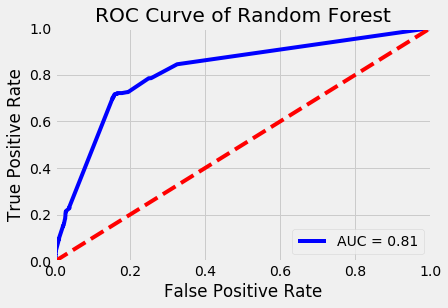

In [23]:
# TOMAMOS UN MODELO PEQUENIO

# LE COLOCAMOS UN LIMITE A LA PROFUNDIDAD DE 3 NIVELES E INSTANCIAMOS 10 ARBOLES
rf_small = RandomForestRegressor(n_estimators=10, random_state=42, max_depth = 3)
rf_small.fit(train_features, train_labels)

# TOMAMOS UN ARBOL CUALQUIERA PARA GRAFICARLO EN "small_tree.png"
tree_small = rf_small.estimators_[5]

# GUARDAMOS EL GRAFICO EN EL ARCHIVO PNG
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

# USAMOS EL MODELO PARA PREDECIR
small_predictions = rf_small.predict(test_features)

# GENERAMOS LA MATRIZ DE CONFUSION
small_conf_mat = confusion_matrix(test_labels, np.around(small_predictions))

#CORREMOS NUESTRA FUNCION DE EVALUACION
evaluate(small_conf_mat,"Accuracy")



#GRAFICO DE CURVA AUC-ROC - SMALL
#GRAFICO DE CURVA AUR-ROC PARA MOST-IMPORTANT
#SOLO SE DEBE REEMPLAZAR LOS LABELS Y LAS PREDICCIONES EN roc_curve

fpr, tpr, threshold = roc_curve(test_labels, small_predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic -SMALL')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()